In [35]:
import pandas as pd
import numpy as np


In [36]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/smsspamcollection (1).tsv', sep='\t')

In [37]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [38]:
df.shape

(5572, 4)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.3+ KB


In [40]:
df1 = df.drop(columns=['length','punct'])

In [41]:
df1.sample(5)

,label,message
3915,ham,Today is ACCEPT DAY..U Accept me as? Brother S...
2224,spam,"Thanks for your ringtone order, ref number K71..."
1347,ham,Is it ok if I stay the night here? Xavier has ...
2907,ham,"Helloooo... Wake up..! ""Sweet"" ""morning"" ""welc..."
705,ham,True dear..i sat to pray evening and felt so.s...


In [42]:
from sklearn.preprocessing import LabelEncoder
encoder=  LabelEncoder()
encoder .fit_transform(df1["label"])

array([0, 0, 1, ..., 0, 0, 0])

In [43]:
df1['label'] = encoder.fit_transform(df1['label'])

In [44]:
df1

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [45]:
df1.isnull().sum()

,0
label,0
message,0


In [46]:
df1.duplicated().sum()

np.int64(403)

In [47]:
df1=df1.drop_duplicates(keep='first')

In [48]:
df1.duplicated().sum()

np.int64(0)

In [49]:
df1.shape

(5169, 2)

EDA

In [50]:
df1['label'].value_counts()

,count
label,
0,4516
1,653


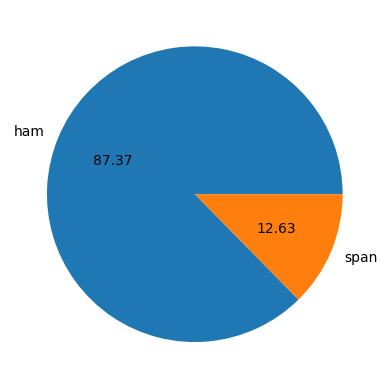

In [51]:
import matplotlib.pyplot as plt
plt.pie(df1['label'].value_counts(), labels=['ham' , 'span'] , autopct ='%0.2f')
plt.show()

In [52]:
import nltk

In [53]:
#nltk.download('punkt')    #below updated version

In [54]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [55]:
df1['message'].apply(len)

,message
0,111
1,29
2,155
3,49
4,61
...,...
5567,160
5568,36
5569,57
5570,125


In [56]:
df1['num_chr'] = df1['message'].apply(len)

/tmp/ipython-input-3732687109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['num_chr'] = df1['message'].apply(len)


In [57]:
df1.head()

,label,message,num_chr
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [58]:
df1['message'].apply(lambda x:nltk.word_tokenize(x))

,message
0,"[Go, until, jurong, point, ,, crazy, .., Avail..."
1,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,"[Nah, I, do, n't, think, he, goes, to, usf, ,,..."
...,...
5567,"[This, is, the, 2nd, time, we, have, tried, 2,..."
5568,"[Will, ü, b, going, to, esplanade, fr, home, ?]"
5569,"[Pity, ,, *, was, in, mood, for, that, ., So, ..."
5570,"[The, guy, did, some, bitching, but, I, acted,..."


In [59]:
df1['message'].apply(lambda x:len(nltk.word_tokenize(x)))

,message
0,24
1,8
2,37
3,13
4,15
...,...
5567,35
5568,9
5569,15
5570,27


In [60]:
df1['num_words'] = df1['message'].apply(lambda x:len(nltk.word_tokenize(x)))

/tmp/ipython-input-1184053677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['num_words'] = df1['message'].apply(lambda x:len(nltk.word_tokenize(x)))


In [61]:
df1.head()

,label,message,num_chr,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [62]:
df1['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

,message
0,2
1,2
2,2
3,1
4,1
...,...
5567,4
5568,1
5569,2
5570,1


In [63]:
df1['num_sentences'] = df1['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

/tmp/ipython-input-1495297927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['num_sentences'] = df1['message'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [64]:
df1.head()

,label,message,num_chr,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [67]:
df1[['num_words','num_chr' ,     'num_sentences' ]].describe()

,num_words,num_chr,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,18.593538,79.344941,1.974076
std,13.402779,58.439256,1.458967
min,1.000000,2.000000,1.000000
25%,9.000000,36.000000,1.000000
50%,15.000000,61.000000,1.000000
75%,26.000000,119.000000,2.000000
max,220.000000,910.000000,38.000000


In [69]:
#ham
df1[df1['label']== 0][['num_words','num_chr' , 'num_sentences' ]].describe()

,num_words,num_chr,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,17.267715,70.906333,1.827724
std,13.588065,56.717234,1.394338
min,1.000000,2.000000,1.000000
25%,8.000000,34.000000,1.000000
50%,13.000000,53.000000,1.000000
75%,22.000000,91.000000,2.000000
max,220.000000,910.000000,38.000000


In [71]:
#span
df1[df1['label']== 1][['num_words','num_chr' , 'num_sentences' ]].describe()

,num_words,num_chr,num_sentences
count,653.000000,653.000000,653.000000
mean,27.762634,137.704441,2.986217
std,6.993008,29.821348,1.494815
min,2.000000,13.000000,1.000000
25%,25.000000,132.000000,2.000000
50%,29.000000,148.000000,3.000000
75%,32.000000,157.000000,4.000000
max,46.000000,223.000000,9.000000


In [72]:
import seaborn as sns

<Axes: xlabel='num_chr', ylabel='Count'>

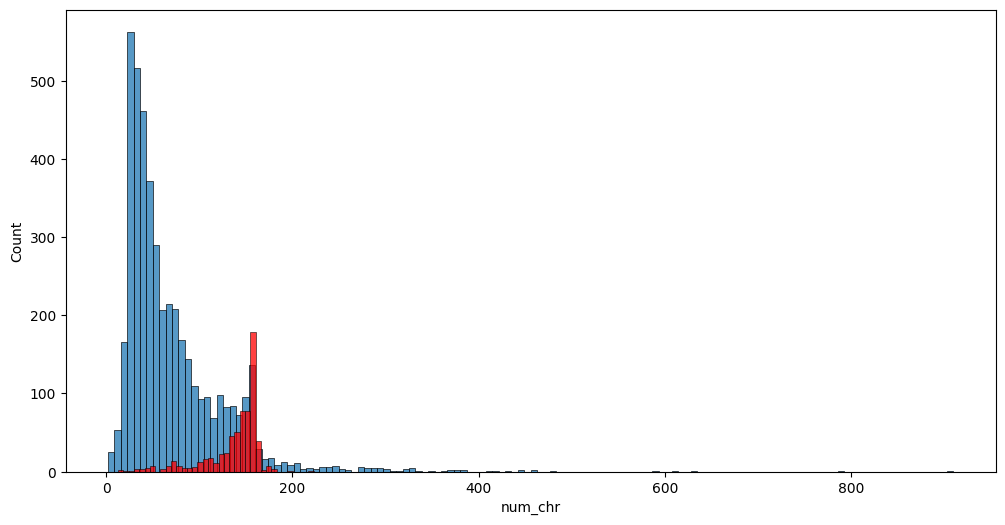

In [73]:
plt.figure(figsize=(12,6))
sns.histplot(df1[df1['label']==0]['num_chr'])
sns.histplot(df1[df1['label']==1]['num_chr'] , color= 'r')

<Axes: xlabel='num_words', ylabel='Count'>

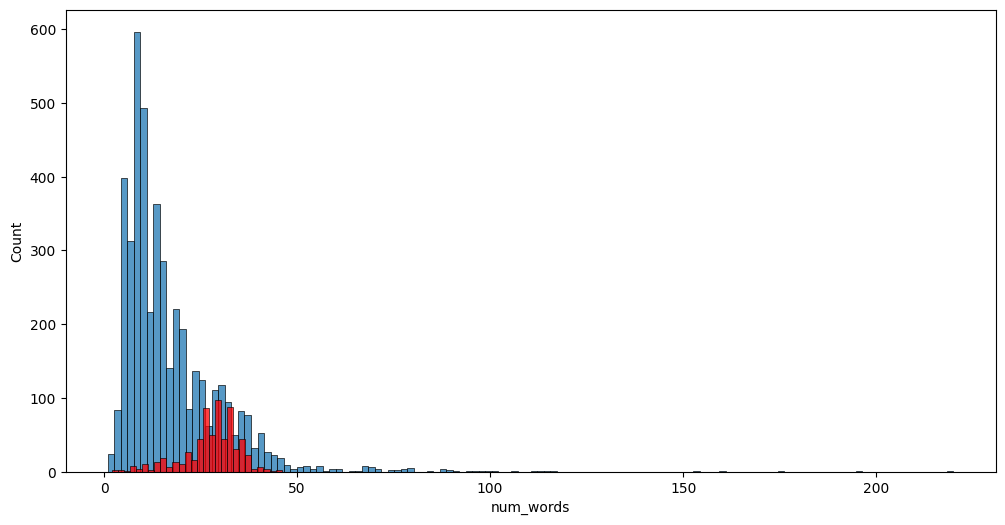

In [75]:
plt.figure(figsize=(12,6))
sns.histplot(df1[df1['label']==0]['num_words'])
sns.histplot(df1[df1['label']==1]['num_words'] , color= 'r')

<Axes: xlabel='num_sentences', ylabel='Count'>

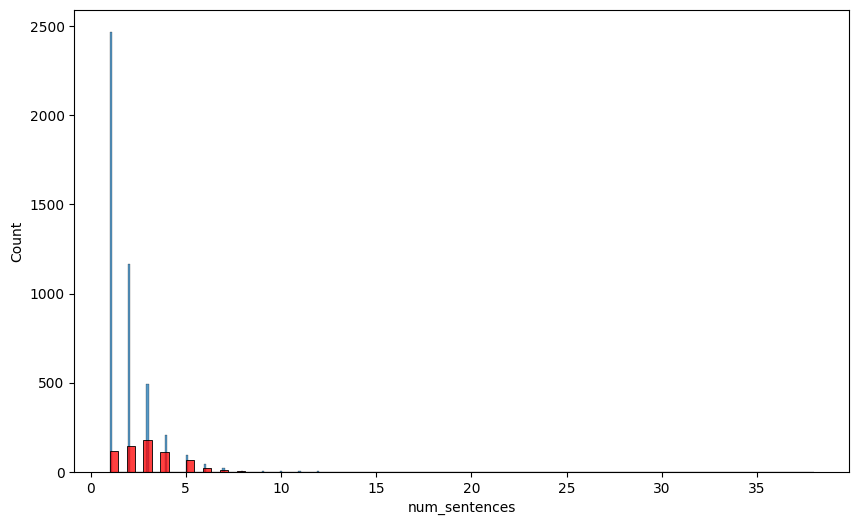

In [79]:
plt.figure(figsize=(10,6))
sns.histplot(df1[df1['label']==0]['num_sentences'])
sns.histplot(df1[df1['label']==1]['num_sentences'] , color= 'r')

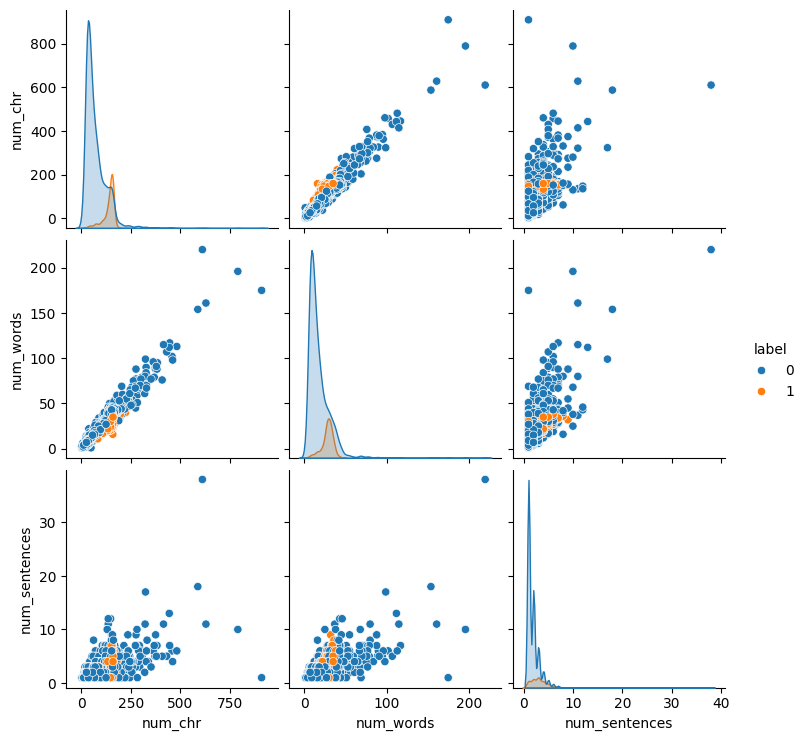

In [81]:
sns.pairplot(df1, hue='label')

In [83]:
df2 = df1.drop(columns=['message'])

In [84]:
df2.corr()

,label,num_chr,num_words,num_sentences
label,1.000000,0.379777,0.260168,0.263826
num_chr,0.379777,1.000000,0.966002,0.622566
num_words,0.260168,0.966002,1.000000,0.679142
num_sentences,0.263826,0.622566,0.679142,1.000000


<Axes: >

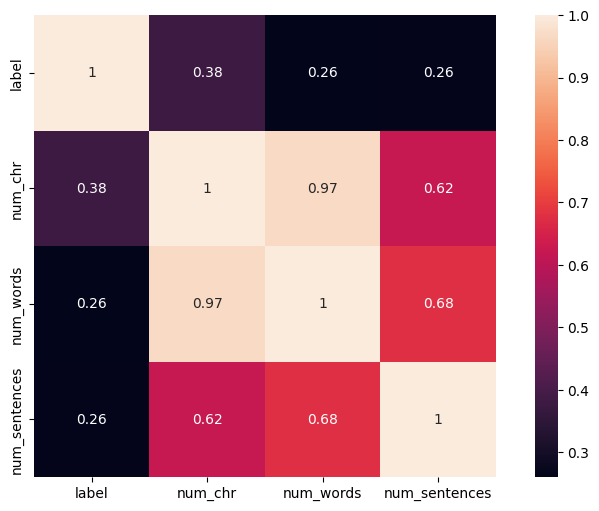

In [85]:
plt.figure(figsize=(10,6))
sns.heatmap(df2.corr() , annot=True , square=True)

##data preprocessing